<a href="https://colab.research.google.com/github/LolloS8/Quantitative-Trading-Strategies/blob/main/Trading_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXERCISE 1: Build a forecatsing model on the S&P 500

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Download data
ticker = '^GSPC'
start_date = '2015-01-01'
end_date = '2025-08-25'
data = yf.download(ticker, start = start_date, end = end_date, auto_adjust = True, progress = False)

if data.empty:
    print("Download failed.")
else:
    print("Data downloaded successfully!")

# 2. Setting the model: DataFrame, daily returns, features and target
df = pd.DataFrame(index = data.index)
df['returns'] = data['Close'].pct_change()

df['target'] = (df['returns'].shift(-1) > 0).astype(int) #astype(int) converts objects into integers

for i in range(1,6):
  df[f'lag_{i}'] = df['returns'].shift(i)

# 4. Clean the Dataset
df.dropna(inplace = True)

# 5. Splitting X from Y
X = df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['target']

# 6. Training and Test Set
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("\nData preparation complete.")
print(f"Total clean data points: {len(X)}")
print(f"Training set size: {len(X_train)} points")
print(f"Test set size: {len(X_test)} points")

# 7. Logistic Regression Model
def logistic_regression_model(X_train, y_train, X_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# 8. Forecasting
y_pred = logistic_regression_model(X_train, y_train, X_test)

# 9. Accurancy
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Model Evaluation (Out-of-Sample) ---")
print(f"Model Accuracy on the test set: {accuracy:.4f}")

print("\nClassification Report (Out-of-Sample):")
print(classification_report(y_test, y_pred, target_names=['DOWN', 'UP']))


Data downloaded successfully!

Data preparation complete.
Total clean data points: 2670
Training set size: 2136 points
Test set size: 534 points

--- Model Evaluation (Out-of-Sample) ---
Model Accuracy on the test set: 0.5655

Classification Report (Out-of-Sample):
              precision    recall  f1-score   support

        DOWN       0.00      0.00      0.00       232
          UP       0.57      1.00      0.72       302

    accuracy                           0.57       534
   macro avg       0.28      0.50      0.36       534
weighted avg       0.32      0.57      0.41       534



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model simply learned that since there are more "UP" days than "DOWN" days (302 vs 232), the easiest way to get a decent accuracy score is to predict "UP" every single time.

The robustness test (the classification_report) has worked perfectly again. It has proven that even with slightly different data, this simple model is not reliable and has no real predictive power. It only predicts the most common outcome.

EXERCISE 2: take the "UP" (1) and "DOWN" (0) forecasts from  LogisticRegression model and visually see whether a strategy based on them would have made or lost money.

Data downloaded successfully!

Data preparation complete.
Total clean data points: 2670
Training set size: 2136 points
Test set size: 534 points

--- Model Evaluation (Out-of-Sample) ---
Model Accuracy on the test set: 0.5655

Classification Report (Out-of-Sample):
              precision    recall  f1-score   support

        DOWN       0.00      0.00      0.00       232
          UP       0.57      1.00      0.72       302

    accuracy                           0.57       534
   macro avg       0.28      0.50      0.36       534
weighted avg       0.32      0.57      0.41       534

--- DEBUG 1: Checking the model's predictions ---
1    534
Name: count, dtype: int64
------------------------------

--- DEBUG 2: Checking the first 5 strategy returns ---
Date
2023-07-11    0.006742
2023-07-12    0.007411
2023-07-13    0.008470
2023-07-14   -0.001024
2023-07-17    0.003855
Name: strategy_returns, dtype: float64
------------------------------

--- DEBUG 3: Checking the first 5 values of 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plot saved successfully as 'ml_strategy_simple_backtest.png'


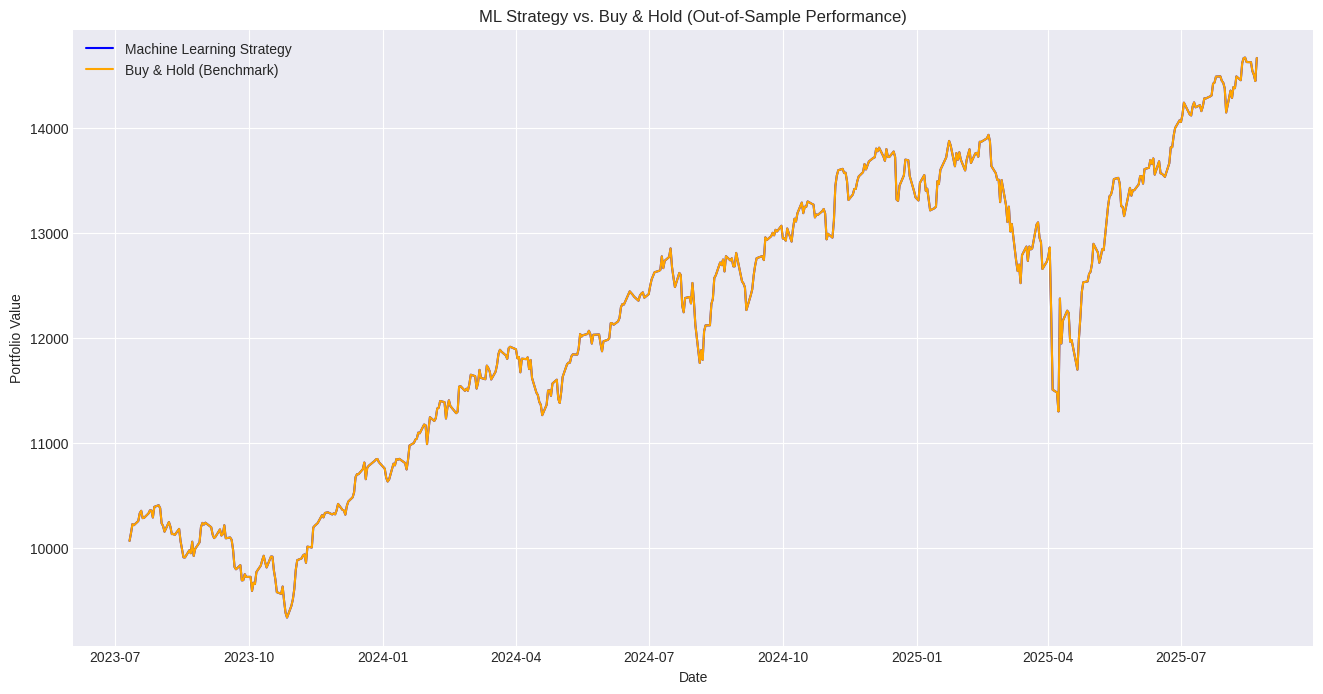

In [24]:
# 1. Code of Exercise 1
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Download data
ticker = '^GSPC'
start_date = '2015-01-01'
end_date = '2025-08-25'
data = yf.download(ticker, start = start_date, end = end_date, auto_adjust = True, progress = False)

if data.empty:
    print("Download failed.")
else:
    print("Data downloaded successfully!")

# 2. Setting the model: DataFrame, daily returns, features and target
df = pd.DataFrame(index = data.index)
df['returns'] = data['Close'].pct_change()

df['target'] = (df['returns'].shift(-1) > 0).astype(int) #astype(int) converts objects into integers

for i in range(1,6):
  df[f'lag_{i}'] = df['returns'].shift(i)

# 4. Clean the Dataset
df.dropna(inplace = True)

# 5. Splitting X from Y
X = df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['target']

# 6. Training and Test Set
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("\nData preparation complete.")
print(f"Total clean data points: {len(X)}")
print(f"Training set size: {len(X_train)} points")
print(f"Test set size: {len(X_test)} points")

# 7. Logistic Regression Model
def logistic_regression_model(X_train, y_train, X_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# 8. Forecasting
y_pred = logistic_regression_model(X_train, y_train, X_test)

# 9. Accurancy
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Model Evaluation (Out-of-Sample) ---")
print(f"Model Accuracy on the test set: {accuracy:.4f}")

print("\nClassification Report (Out-of-Sample):")
print(classification_report(y_test, y_pred, target_names=['DOWN', 'UP']))

# 1. Isolate test set market returns
market_returns_test = df['returns'].loc[X_test.index]

# 2. Calculate Strategy Returns
strategy_df = pd.DataFrame(index=X_test.index)
strategy_df['prediction'] = y_pred

# --- DEBUG 1: Check the model's predictions ---
print("--- DEBUG 1: Checking the model's predictions ---")
# Let's count how many times it predicted UP (1) vs DOWN (0)
print(pd.Series(y_pred).value_counts())
print("-" * 30)
# ---------------------------------------------

strategy_df['signal'] = strategy_df['prediction'].shift(1)
strategy_df['strategy_returns'] = strategy_df['signal'] * market_returns_test
strategy_df.dropna(inplace=True)

# --- DEBUG 2: Check the calculated strategy returns ---
print("\n--- DEBUG 2: Checking the first 5 strategy returns ---")
print(strategy_df['strategy_returns'].head())
print("-" * 30)
# --------------------------------------------------

# 3. Calculate Strategy Equity Curve
initial_capital = 10000
equity_curve = pd.DataFrame(index=strategy_df.index)
equity_curve['strategy_equity'] = (1 + strategy_df['strategy_returns']).cumprod() * initial_capital

# --- DEBUG 3: Check the resulting equity curve data ---
print("\n--- DEBUG 3: Checking the first 5 values of the equity curve ---")
print(equity_curve['strategy_equity'].head())
print("-" * 30)
# ----------------------------------------------------

# 4. Calculate Buy & Hold (Benchmark) Equity Curve
benchmark_returns_test = market_returns_test.loc[strategy_df.index]
benchmark_equity = (1 + benchmark_returns_test).cumprod() * initial_capital

# 5. Plotting
print("\nGenerating plot...")
plt.figure(figsize=(16, 8))
plt.style.use('seaborn-v0_8-darkgrid')

plt.plot(equity_curve['strategy_equity'], label='Machine Learning Strategy', color='blue') # Explicitly setting color
plt.plot(benchmark_equity, label='Buy & Hold (Benchmark)', color='orange')

plt.title('ML Strategy vs. Buy & Hold (Out-of-Sample Performance)')
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.legend()

plt.savefig('ml_strategy_simple_backtest.png')
print("Plot saved successfully as 'ml_strategy_simple_backtest.png'")







The Machine Learning strategy, in its current form, is unreliable and fails the backtest. It provides no value over a simple Buy & Hold approach.

The strategy's equity curve (the blue line) is not missing from the plot; it is perfectly hidden underneath the benchmark's equity curve (the orange line).

EXERCISE 3: Build a basic Neural Network model to tackle the exact same problem as before: predict if the S&P 500 will go UP or DOWN tomorrow based on the last 5 days of returns

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


# 1. Download data
ticker = '^GSPC'
start_date = '2015-01-01'
end_date = '2025-08-25'
data = yf.download(ticker, start = start_date, end = end_date, auto_adjust = True, progress = False)

if data.empty:
    print("Download failed.")
else:
    print("Data downloaded successfully!")

# 2. Setting the model: DataFrame, daily returns, features and target
df = pd.DataFrame(index = data.index)
df['returns'] = data['Close'].pct_change()

df['target'] = (df['returns'].shift(-1) > 0).astype(int) #astype(int) converts objects into integers

for i in range(1,6):
  df[f'lag_{i}'] = df['returns'].shift(i)

# 4. Clean the Dataset
df.dropna(inplace = True)

# 5. Splitting X from Y
X = df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['target']

# 6. Training and Test Set
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("\nData preparation complete.")
print(f"Total clean data points: {len(X)}")
print(f"Training set size: {len(X_train)} points")
print(f"Test set size: {len(X_test)} points")

# 7. Standardize the set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Define NN Model
model = MLPClassifier(
        hidden_layer_sizes=(64,32),
        activation='relu',
        solver='adam',
        max_iter=500, # Added max_iter to ensure convergence
        random_state=42
    )

# 9. Train the model
print("\nTrainig the Neural Network Model...")
model.fit(X_train_scaled, y_train)
print("Model trained successfully")

# 10. Make prediction and evaluate
y_pred = model.predict(X_test_scaled)
accurancy = accuracy_score(y_test, y_pred)

print("\n--- Neural Network Model Evaluation (Out-of-Sample) ---")
print(f"Model Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['DOWN', 'UP']))



Data downloaded successfully!

Data preparation complete.
Total clean data points: 2670
Training set size: 2136 points
Test set size: 534 points

Trainig the Neural Network Model...
Model trained successfully

--- Neural Network Model Evaluation (Out-of-Sample) ---
Model Accuracy on the test set: 0.5655

Classification Report:
              precision    recall  f1-score   support

        DOWN       0.47      0.50      0.48       232
          UP       0.59      0.57      0.58       302

    accuracy                           0.54       534
   macro avg       0.53      0.53      0.53       534
weighted avg       0.54      0.54      0.54       534



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The Neural Network model shows a significant improvement in behavior compared to the previous Logistic Regression. Unlike the 'lazy' model that only predicted the majority class, this MLP classifier actively predicts both UP and DOWN days, as evidenced by the non-zero precision (0.47) and recall (0.50) for the DOWN class.
Although the overall accuracy (~54%) is modest, it is a more robust and meaningful result because the model is genuinely attempting to find a predictive pattern for both market directions. This makes it a much better foundation for further development and strategy building.

The F1-score is the harmonic mean of Precision and Recall. It's a single, balanced score that is high only when both precision and recall are high.